In [81]:
import numpy as np
import cv2
import matplotlib.pyplot as mplt


# set matplotlib to print inline (Jupyter)
%matplotlib inline

# path prefix
pth = '../local/Set1/'

files = ['img0.jpg']

# Usefull function
def rg(img_path):
    return cv2.imread(pth+img_path, cv2.IMREAD_COLOR)

def bgr2hsv(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def hsv2bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_HSV2BGR)

def bgr2gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Snapshot of frame: (208, 418, 79, 33)


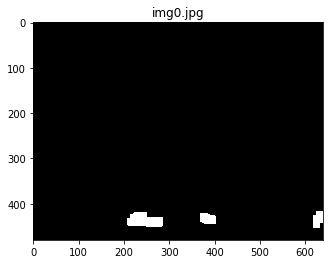

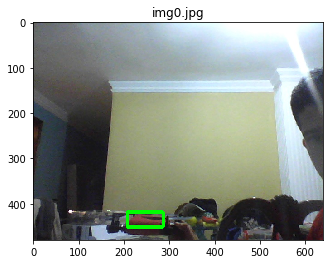

In [101]:
erode = True
dilate = True

img = rg(files[0])
img_rgb = bgr2rgb(img)
img_hsv = bgr2hsv(img)

# HSV color space is conic, so we have the same color in two extremes of the space
# lower and upper colors.
# Ranges for red
lower_red = np.array([0,99,89])
upper_red = np.array([9,198,211])

# Threshold the HSV image to get only red colors
mask = cv2.inRange(img_hsv, lower_red, upper_red)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(img, img, mask=mask)
ret, res = cv2.threshold(res, 20, 255, 0)
res = res[:,:,0]

if erode:
    kernel = np.ones((3, 3), np.uint8)
    res = cv2.erode(res, kernel, iterations=1)
if dilate:
    kernel = np.ones((9, 9), np.uint8)
    res = cv2.dilate(res, kernel, iterations=2)

img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gr,127,255,0)

_, contours, _ = cv2.findContours(res, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

mins_x, mins_y = list(), list()
maxs_x, maxs_y = list(), list()
for contour in contours:
    cnt = [c[0] for c in contour]
    cnt_x = [c[0] for c in cnt]
    cnt_y = [c[1] for c in cnt]
    mins_x.append(min(cnt_x))
    mins_y.append(min(cnt_y))
    maxs_x.append(max(cnt_x))
    maxs_y.append(max(cnt_y))

dists_x = [ma-mi for ma, mi in zip(maxs_x, mins_x)]
dists_y = [ma-mi for ma, mi in zip(maxs_y, mins_y)]

areas = [x*y for x, y in zip(dists_x, dists_y)]
index_of_largest = areas.index(max(areas))

w = maxs_x[index_of_largest] - mins_x[index_of_largest]
h = maxs_y[index_of_largest] - mins_y[index_of_largest]

top_left_point = (mins_x[index_of_largest], mins_y[index_of_largest])
bottom_right_point = (maxs_x[index_of_largest], maxs_y[index_of_largest])

cv2.rectangle(img_rgb, top_left_point, bottom_right_point, (0, 255, 0), 5)

x, y = top_left_point[0], top_left_point[1]
w, h = bottom_right_point[0] - top_left_point[0], bottom_right_point[1] - top_left_point[1]
snapshot = (x, y, w, h)

print('Snapshot of frame:', snapshot)

mplt.figure()
mplt.imshow(res, cmap='gray')
mplt.title(files[0])

mplt.figure()
mplt.imshow(img_rgb)
mplt.title(files[0])